In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as consts

In [2]:
R1 = .05
R2 = 0.1
p0 = 50 * 10**-9
e0 = consts.epsilon_0
k = (p0 / (5*e0*R2**2))
print(k)

112940.90667581471


In [3]:
EexR2 = k*(R2**5-R1**5)/R2**2
EinR2 = k*(R2**3-R1**5/R2**2)
phiExR2 = k*(R2**5-R1**5)/R2
phiInR2 = k*(5*R2**4/4-R2**4/4-R1**5/R2)
phiInR1 = 5*k/4*(R2**4-R1**4)
pmin = p0*(R1/R2)**2 * 10**9
pmax = p0 * 10**9
print("Eex(R2) = {} (B/м)".format(np.round(EexR2, 3)))
print("Ein(R2) = {} (В/м)".format(np.round(EinR2, 3)))
print("phiEx(R2) = {} (В)".format(np.round(phiExR2,3)))
print("phiIn(R2) = {} (В)".format(np.round(phiInR2,3)))
print("phiIn(R1) = {} (В)".format(np.round(phiInR1,3)))
print("p(R1) = {} (нКл)".format(np.round(pmin,3)))
print("p(R2) = {} (нКл)".format(np.round(pmax,3)))

Eex(R2) = 109.412 (B/м)
Ein(R2) = 109.412 (В/м)
phiEx(R2) = 10.941 (В)
phiIn(R2) = 10.941 (В)
phiIn(R1) = 13.235 (В)
p(R1) = 12.5 (нКл)
p(R2) = 50.0 (нКл)


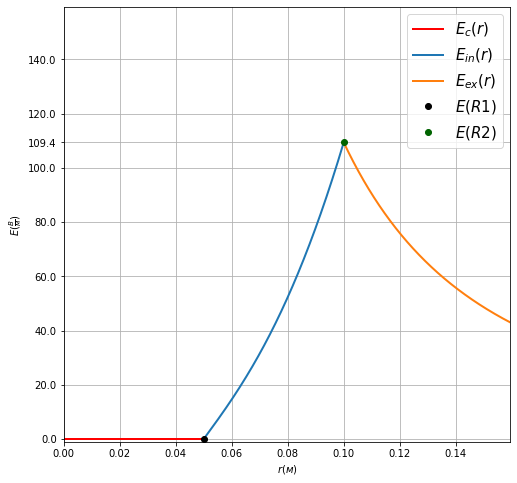

In [4]:
plt.figure(figsize = (8,8))
plt.ylabel(r"$E(\frac{В}{м})$")
plt.rc('font', size=15)
plt.xlabel("$r(м)$")
plt.grid();


rC = np.arange(0,0.05,0.0001)
rIn = np.arange(0.05,0.1,0.00001)
rEx = np.arange(0.1,0.2,0.0001)
Ec = np.zeros(len(rC))
Ein = k*(rIn**3-R1**5/rIn**2)
Eex = k*(R2**5-R1**5)/rEx**2

scale = np.max(Ein+50) / np.max(rEx) / 1000
plt.xlim(0,np.max(rEx) * scale)
plt.ylim(-1, np.max(Ein+50))
plt.yticks([0, 20, 40, 60, 80, 100, EexR2, 120, 140])

plt.plot(rC, Ec, '-', linewidth = 2, color='red', label = r"$E_c (r)$")
plt.plot(rIn, Ein, '-', linewidth = 2, label = r"$E_{in} (r)$")
plt.plot(rEx, Eex, '-', linewidth = 2, label = r"$E_{ex} (r)$")
plt.plot(R1,0,'o', color='black',label=r"$E(R1)$")
plt.plot(R2,EexR2,'o', color="#006400",label=r"$E(R2)$")
plt.legend(loc="best");

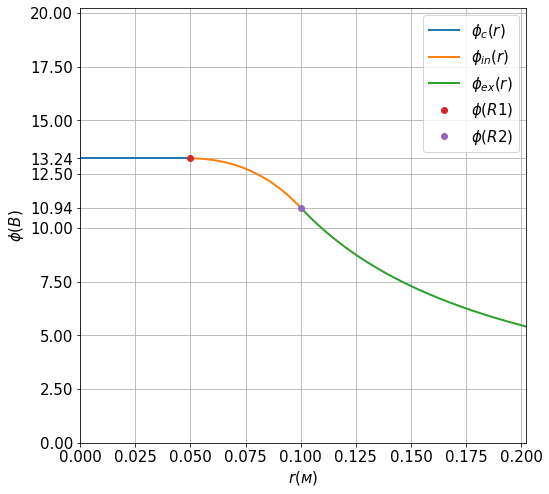

In [5]:
plt.figure(figsize = (8,8))
plt.ylabel("$\phi(В)$")
plt.rc('font', size=15)
plt.xlabel("$r(м)$")
plt.grid();


rC = np.arange(0,0.05,0.0001)
rIn = np.arange(0.05,0.1,0.00001)
rEx = np.arange(0.1,0.3,0.0001)
phiC = phiInR1 * np.ones(len(rC))
phiIn = k*(5*R2**4/4-rIn**4/4-R1**5/rIn)
phiEx = k*(R2**5-R1**5)/rEx

scale = np.max(phiIn+7) / np.max(rEx) / 100
plt.xlim(0,np.max(rEx) * scale)
plt.ylim(0, np.max(phiIn+7))
plt.yticks([0, 2.5, 5, 7.5, 10, phiExR2, 12.5, phiInR1, 15, 17.5, 20])

plt.plot(rC, phiC, '-', linewidth = 2, label = r"$\phi_{c} (r)$")
plt.plot(rIn, phiIn, '-', linewidth = 2, label = r"$\phi_{in} (r)$")
plt.plot(rEx, phiEx, '-', linewidth = 2, label = r"$\phi_{ex} (r)$")
plt.plot(R1,phiInR1,'o', label=r"$\phi(R1)$")
plt.plot(R2,phiExR2,'o',label=r"$\phi(R2)$")
plt.legend(loc="best");

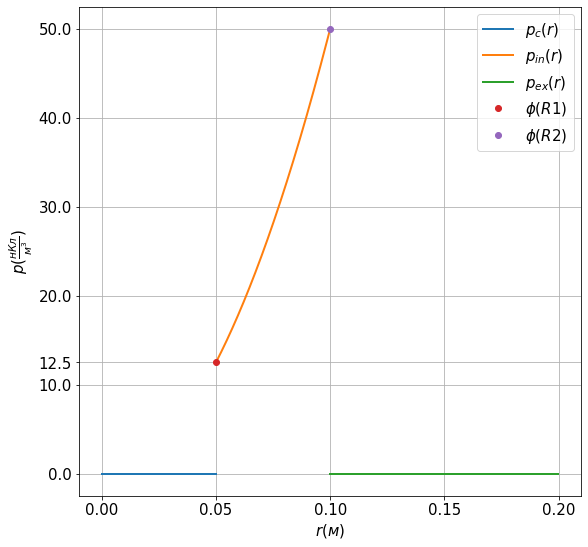

In [6]:
plt.figure(figsize = (9,9))
plt.ylabel(r"$p(\frac{нКл}{м^3})$")
plt.rc('font', size=15)
plt.xlabel("$r(м)$")
plt.grid();


rC = np.arange(0,0.05,0.0001)
rIn = np.arange(0.05,0.1,0.000001)
rEx = np.arange(0.1,0.2,0.0001)
pC = np.zeros(len(rC))
pIn = p0*rIn**2/R2**2 * 10**9
pEx = np.zeros(len(rEx))
#r = np.concatenate((rC,rIn,rEx))
#p = np.concatenate((qC,qIn,qEx))

#scale = np.max(qIn+5) / np.max(rEx) / 100
#plt.xlim(0,np.max(rEx) * scale)
#plt.ylim(-1, np.max(qIn+5))
plt.yticks([0, 10, pmin, 20, 30, 40, 50])
plt.xticks([0,0.05,0.1, 0.15,0.2])

plt.plot(rC, pC, '-', linewidth = 2, label = r"$p_c(r)$")
plt.plot(rIn, pIn, '-', linewidth = 2, label = r"$p_{in}(r)$")
plt.plot(rEx, pEx, '-', linewidth = 2, label = r"$p_{ex}(r)$")
#plt.plot(r, p, '-', linewidth = 2, label = r"$p(r)$")
plt.plot(R1,pmin,'o', label=r"$\phi(R1)$")
plt.plot(R2,pmax,'o',label=r"$\phi(R2)$")
plt.legend(loc="best");